## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import californiaDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset - California Dataset 

In [5]:
#Parameters 
n_features = 8
n_samples= 20640
n_target = 1 

In [6]:
X,Y = californiaDataset.california_data()

       X1    X2        X3        X4      X5        X6     X7      X8      Y
0  8.3252  41.0  6.984127  1.023810   322.0  2.555556  37.88 -122.23  4.526
1  8.3014  21.0  6.238137  0.971880  2401.0  2.109842  37.86 -122.22  3.585
2  7.2574  52.0  8.288136  1.073446   496.0  2.802260  37.85 -122.24  3.521
3  5.6431  52.0  5.817352  1.073059   558.0  2.547945  37.85 -122.25  3.413
4  3.8462  52.0  6.281853  1.081081   565.0  2.181467  37.85 -122.25  3.422


In [7]:
#Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])

## Training Parameters 

In [8]:
batch_size = 5000
n_epochs = 100
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X,Y)

Learning rate set to 0.066055
0:	learn: 0.9629179	total: 55.7ms	remaining: 55.6s
1:	learn: 0.9301086	total: 59.8ms	remaining: 29.9s
2:	learn: 0.9005637	total: 63.5ms	remaining: 21.1s
3:	learn: 0.8720983	total: 66.9ms	remaining: 16.7s
4:	learn: 0.8467410	total: 70.1ms	remaining: 13.9s
5:	learn: 0.8226672	total: 73.2ms	remaining: 12.1s
6:	learn: 0.7994702	total: 76ms	remaining: 10.8s
7:	learn: 0.7784272	total: 78.7ms	remaining: 9.76s
8:	learn: 0.7602192	total: 81.5ms	remaining: 8.97s
9:	learn: 0.7412421	total: 84.4ms	remaining: 8.35s
10:	learn: 0.7247930	total: 87.3ms	remaining: 7.85s
11:	learn: 0.7089951	total: 90.2ms	remaining: 7.43s
12:	learn: 0.6951345	total: 93.7ms	remaining: 7.11s
13:	learn: 0.6809276	total: 96.9ms	remaining: 6.82s
14:	learn: 0.6692630	total: 99.8ms	remaining: 6.55s
15:	learn: 0.6588323	total: 104ms	remaining: 6.38s
16:	learn: 0.6472700	total: 107ms	remaining: 6.17s
17:	learn: 0.6379982	total: 110ms	remaining: 5.98s
18:	learn: 0.6294674	total: 113ms	remaining: 5.82

41:	learn: 0.5170220	total: 183ms	remaining: 4.17s
42:	learn: 0.5141148	total: 186ms	remaining: 4.13s
43:	learn: 0.5116444	total: 189ms	remaining: 4.1s
44:	learn: 0.5100547	total: 191ms	remaining: 4.06s
45:	learn: 0.5069096	total: 194ms	remaining: 4.03s
46:	learn: 0.5051685	total: 197ms	remaining: 3.99s
47:	learn: 0.5033968	total: 200ms	remaining: 3.96s
48:	learn: 0.5012433	total: 203ms	remaining: 3.94s
49:	learn: 0.4986132	total: 206ms	remaining: 3.91s
50:	learn: 0.4968022	total: 208ms	remaining: 3.88s
51:	learn: 0.4951632	total: 211ms	remaining: 3.85s
52:	learn: 0.4928924	total: 214ms	remaining: 3.82s
53:	learn: 0.4917272	total: 217ms	remaining: 3.8s
54:	learn: 0.4895079	total: 220ms	remaining: 3.78s
55:	learn: 0.4881884	total: 223ms	remaining: 3.75s
56:	learn: 0.4861566	total: 225ms	remaining: 3.73s
57:	learn: 0.4850201	total: 229ms	remaining: 3.72s
58:	learn: 0.4840055	total: 233ms	remaining: 3.72s
59:	learn: 0.4824455	total: 236ms	remaining: 3.7s
60:	learn: 0.4809744	total: 239ms	

103:	learn: 0.4466014	total: 375ms	remaining: 3.23s
104:	learn: 0.4461730	total: 378ms	remaining: 3.22s
105:	learn: 0.4457259	total: 381ms	remaining: 3.21s
106:	learn: 0.4451085	total: 387ms	remaining: 3.23s
107:	learn: 0.4447909	total: 390ms	remaining: 3.22s
108:	learn: 0.4440936	total: 395ms	remaining: 3.23s
109:	learn: 0.4435519	total: 398ms	remaining: 3.22s
110:	learn: 0.4431075	total: 405ms	remaining: 3.24s
111:	learn: 0.4425498	total: 408ms	remaining: 3.23s
112:	learn: 0.4419106	total: 411ms	remaining: 3.22s
113:	learn: 0.4414425	total: 414ms	remaining: 3.22s
114:	learn: 0.4407446	total: 417ms	remaining: 3.21s
115:	learn: 0.4402011	total: 420ms	remaining: 3.2s
116:	learn: 0.4398559	total: 423ms	remaining: 3.19s
117:	learn: 0.4392990	total: 426ms	remaining: 3.18s
118:	learn: 0.4389153	total: 429ms	remaining: 3.17s
119:	learn: 0.4383331	total: 432ms	remaining: 3.17s
120:	learn: 0.4378136	total: 435ms	remaining: 3.16s
121:	learn: 0.4375553	total: 437ms	remaining: 3.15s
122:	learn: 0

166:	learn: 0.4176884	total: 565ms	remaining: 2.82s
167:	learn: 0.4173026	total: 568ms	remaining: 2.81s
168:	learn: 0.4170486	total: 571ms	remaining: 2.81s
169:	learn: 0.4165960	total: 574ms	remaining: 2.8s
170:	learn: 0.4161870	total: 577ms	remaining: 2.79s
171:	learn: 0.4156228	total: 580ms	remaining: 2.79s
172:	learn: 0.4153041	total: 583ms	remaining: 2.79s
173:	learn: 0.4148857	total: 585ms	remaining: 2.78s
174:	learn: 0.4144190	total: 588ms	remaining: 2.77s
175:	learn: 0.4140875	total: 591ms	remaining: 2.77s
176:	learn: 0.4136755	total: 594ms	remaining: 2.76s
177:	learn: 0.4133860	total: 597ms	remaining: 2.76s
178:	learn: 0.4129780	total: 600ms	remaining: 2.75s
179:	learn: 0.4122907	total: 603ms	remaining: 2.75s
180:	learn: 0.4119188	total: 606ms	remaining: 2.74s
181:	learn: 0.4115412	total: 608ms	remaining: 2.73s
182:	learn: 0.4112620	total: 611ms	remaining: 2.73s
183:	learn: 0.4107734	total: 614ms	remaining: 2.72s
184:	learn: 0.4104881	total: 617ms	remaining: 2.72s
185:	learn: 0

232:	learn: 0.3951665	total: 756ms	remaining: 2.49s
233:	learn: 0.3949269	total: 759ms	remaining: 2.48s
234:	learn: 0.3945894	total: 762ms	remaining: 2.48s
235:	learn: 0.3944181	total: 764ms	remaining: 2.47s
236:	learn: 0.3941497	total: 767ms	remaining: 2.47s
237:	learn: 0.3939819	total: 770ms	remaining: 2.47s
238:	learn: 0.3938322	total: 773ms	remaining: 2.46s
239:	learn: 0.3935463	total: 776ms	remaining: 2.46s
240:	learn: 0.3933166	total: 778ms	remaining: 2.45s
241:	learn: 0.3930992	total: 781ms	remaining: 2.45s
242:	learn: 0.3928898	total: 784ms	remaining: 2.44s
243:	learn: 0.3926199	total: 787ms	remaining: 2.44s
244:	learn: 0.3923955	total: 790ms	remaining: 2.43s
245:	learn: 0.3922312	total: 793ms	remaining: 2.43s
246:	learn: 0.3919499	total: 795ms	remaining: 2.42s
247:	learn: 0.3917420	total: 798ms	remaining: 2.42s
248:	learn: 0.3915186	total: 801ms	remaining: 2.41s
249:	learn: 0.3912759	total: 804ms	remaining: 2.41s
250:	learn: 0.3908375	total: 806ms	remaining: 2.4s
251:	learn: 0

292:	learn: 0.3812172	total: 949ms	remaining: 2.29s
293:	learn: 0.3809978	total: 952ms	remaining: 2.29s
294:	learn: 0.3807825	total: 955ms	remaining: 2.28s
295:	learn: 0.3805940	total: 958ms	remaining: 2.28s
296:	learn: 0.3801959	total: 961ms	remaining: 2.27s
297:	learn: 0.3799439	total: 964ms	remaining: 2.27s
298:	learn: 0.3797228	total: 967ms	remaining: 2.27s
299:	learn: 0.3795554	total: 970ms	remaining: 2.26s
300:	learn: 0.3793733	total: 973ms	remaining: 2.26s
301:	learn: 0.3791607	total: 976ms	remaining: 2.25s
302:	learn: 0.3789297	total: 979ms	remaining: 2.25s
303:	learn: 0.3787482	total: 982ms	remaining: 2.25s
304:	learn: 0.3786528	total: 985ms	remaining: 2.24s
305:	learn: 0.3784406	total: 988ms	remaining: 2.24s
306:	learn: 0.3782934	total: 990ms	remaining: 2.23s
307:	learn: 0.3781631	total: 993ms	remaining: 2.23s
308:	learn: 0.3779278	total: 996ms	remaining: 2.23s
309:	learn: 0.3777358	total: 999ms	remaining: 2.22s
310:	learn: 0.3775809	total: 1s	remaining: 2.22s
311:	learn: 0.3

359:	learn: 0.3686485	total: 1.14s	remaining: 2.03s
360:	learn: 0.3685749	total: 1.14s	remaining: 2.02s
361:	learn: 0.3683909	total: 1.15s	remaining: 2.02s
362:	learn: 0.3682710	total: 1.15s	remaining: 2.02s
363:	learn: 0.3681254	total: 1.15s	remaining: 2.01s
364:	learn: 0.3679761	total: 1.15s	remaining: 2.01s
365:	learn: 0.3677932	total: 1.16s	remaining: 2s
366:	learn: 0.3676022	total: 1.16s	remaining: 2s
367:	learn: 0.3674148	total: 1.16s	remaining: 2s
368:	learn: 0.3673439	total: 1.17s	remaining: 1.99s
369:	learn: 0.3671985	total: 1.17s	remaining: 1.99s
370:	learn: 0.3670563	total: 1.17s	remaining: 1.99s
371:	learn: 0.3669128	total: 1.18s	remaining: 1.98s
372:	learn: 0.3668381	total: 1.18s	remaining: 1.98s
373:	learn: 0.3666564	total: 1.18s	remaining: 1.98s
374:	learn: 0.3663789	total: 1.18s	remaining: 1.97s
375:	learn: 0.3661576	total: 1.19s	remaining: 1.97s
376:	learn: 0.3659742	total: 1.19s	remaining: 1.96s
377:	learn: 0.3658330	total: 1.19s	remaining: 1.96s
378:	learn: 0.3656680

424:	learn: 0.3583044	total: 1.33s	remaining: 1.8s
425:	learn: 0.3581698	total: 1.34s	remaining: 1.8s
426:	learn: 0.3580461	total: 1.34s	remaining: 1.8s
427:	learn: 0.3579182	total: 1.34s	remaining: 1.79s
428:	learn: 0.3577521	total: 1.34s	remaining: 1.79s
429:	learn: 0.3576138	total: 1.35s	remaining: 1.79s
430:	learn: 0.3575528	total: 1.35s	remaining: 1.78s
431:	learn: 0.3574686	total: 1.35s	remaining: 1.78s
432:	learn: 0.3572923	total: 1.35s	remaining: 1.77s
433:	learn: 0.3571859	total: 1.36s	remaining: 1.77s
434:	learn: 0.3570185	total: 1.36s	remaining: 1.77s
435:	learn: 0.3568416	total: 1.36s	remaining: 1.76s
436:	learn: 0.3566846	total: 1.37s	remaining: 1.76s
437:	learn: 0.3565875	total: 1.37s	remaining: 1.76s
438:	learn: 0.3564768	total: 1.37s	remaining: 1.75s
439:	learn: 0.3563559	total: 1.39s	remaining: 1.76s
440:	learn: 0.3561557	total: 1.39s	remaining: 1.76s
441:	learn: 0.3559793	total: 1.39s	remaining: 1.76s
442:	learn: 0.3558695	total: 1.4s	remaining: 1.76s
443:	learn: 0.35

483:	learn: 0.3500494	total: 1.53s	remaining: 1.63s
484:	learn: 0.3498921	total: 1.53s	remaining: 1.62s
485:	learn: 0.3497143	total: 1.53s	remaining: 1.62s
486:	learn: 0.3496172	total: 1.53s	remaining: 1.62s
487:	learn: 0.3494609	total: 1.54s	remaining: 1.61s
488:	learn: 0.3493200	total: 1.54s	remaining: 1.61s
489:	learn: 0.3491550	total: 1.54s	remaining: 1.61s
490:	learn: 0.3490323	total: 1.55s	remaining: 1.6s
491:	learn: 0.3488767	total: 1.55s	remaining: 1.6s
492:	learn: 0.3487285	total: 1.55s	remaining: 1.6s
493:	learn: 0.3486318	total: 1.55s	remaining: 1.59s
494:	learn: 0.3485016	total: 1.56s	remaining: 1.59s
495:	learn: 0.3484072	total: 1.56s	remaining: 1.59s
496:	learn: 0.3482698	total: 1.56s	remaining: 1.58s
497:	learn: 0.3481630	total: 1.57s	remaining: 1.58s
498:	learn: 0.3480855	total: 1.57s	remaining: 1.57s
499:	learn: 0.3478655	total: 1.57s	remaining: 1.57s
500:	learn: 0.3477966	total: 1.57s	remaining: 1.57s
501:	learn: 0.3476142	total: 1.58s	remaining: 1.56s
502:	learn: 0.3

548:	learn: 0.3416228	total: 1.72s	remaining: 1.41s
549:	learn: 0.3414331	total: 1.72s	remaining: 1.41s
550:	learn: 0.3413090	total: 1.72s	remaining: 1.41s
551:	learn: 0.3411591	total: 1.73s	remaining: 1.4s
552:	learn: 0.3410901	total: 1.73s	remaining: 1.4s
553:	learn: 0.3409923	total: 1.73s	remaining: 1.4s
554:	learn: 0.3408730	total: 1.74s	remaining: 1.39s
555:	learn: 0.3408310	total: 1.74s	remaining: 1.39s
556:	learn: 0.3407365	total: 1.74s	remaining: 1.39s
557:	learn: 0.3406506	total: 1.74s	remaining: 1.38s
558:	learn: 0.3405352	total: 1.75s	remaining: 1.38s
559:	learn: 0.3404352	total: 1.75s	remaining: 1.38s
560:	learn: 0.3403419	total: 1.75s	remaining: 1.37s
561:	learn: 0.3402836	total: 1.76s	remaining: 1.37s
562:	learn: 0.3402264	total: 1.76s	remaining: 1.37s
563:	learn: 0.3400466	total: 1.76s	remaining: 1.36s
564:	learn: 0.3399235	total: 1.77s	remaining: 1.36s
565:	learn: 0.3398064	total: 1.77s	remaining: 1.36s
566:	learn: 0.3396466	total: 1.77s	remaining: 1.35s
567:	learn: 0.3

613:	learn: 0.3350041	total: 1.91s	remaining: 1.2s
614:	learn: 0.3349098	total: 1.91s	remaining: 1.2s
615:	learn: 0.3348304	total: 1.92s	remaining: 1.19s
616:	learn: 0.3347009	total: 1.92s	remaining: 1.19s
617:	learn: 0.3346458	total: 1.92s	remaining: 1.19s
618:	learn: 0.3345381	total: 1.93s	remaining: 1.19s
619:	learn: 0.3344101	total: 1.93s	remaining: 1.18s
620:	learn: 0.3343267	total: 1.93s	remaining: 1.18s
621:	learn: 0.3342275	total: 1.94s	remaining: 1.18s
622:	learn: 0.3341456	total: 1.94s	remaining: 1.17s
623:	learn: 0.3340640	total: 1.94s	remaining: 1.17s
624:	learn: 0.3339122	total: 1.94s	remaining: 1.17s
625:	learn: 0.3337503	total: 1.95s	remaining: 1.16s
626:	learn: 0.3336593	total: 1.95s	remaining: 1.16s
627:	learn: 0.3335713	total: 1.95s	remaining: 1.16s
628:	learn: 0.3333915	total: 1.95s	remaining: 1.15s
629:	learn: 0.3333158	total: 1.96s	remaining: 1.15s
630:	learn: 0.3332088	total: 1.96s	remaining: 1.15s
631:	learn: 0.3331129	total: 1.96s	remaining: 1.14s
632:	learn: 0.

676:	learn: 0.3285218	total: 2.1s	remaining: 1s
677:	learn: 0.3284620	total: 2.1s	remaining: 998ms
678:	learn: 0.3283999	total: 2.1s	remaining: 995ms
679:	learn: 0.3283506	total: 2.11s	remaining: 992ms
680:	learn: 0.3282208	total: 2.12s	remaining: 993ms
681:	learn: 0.3281020	total: 2.12s	remaining: 990ms
682:	learn: 0.3280328	total: 2.13s	remaining: 987ms
683:	learn: 0.3279574	total: 2.13s	remaining: 984ms
684:	learn: 0.3278928	total: 2.13s	remaining: 980ms
685:	learn: 0.3278094	total: 2.13s	remaining: 977ms
686:	learn: 0.3277178	total: 2.14s	remaining: 974ms
687:	learn: 0.3276684	total: 2.14s	remaining: 971ms
688:	learn: 0.3275537	total: 2.14s	remaining: 968ms
689:	learn: 0.3274808	total: 2.15s	remaining: 964ms
690:	learn: 0.3273839	total: 2.15s	remaining: 962ms
691:	learn: 0.3272773	total: 2.15s	remaining: 959ms
692:	learn: 0.3272088	total: 2.16s	remaining: 956ms
693:	learn: 0.3271216	total: 2.16s	remaining: 953ms
694:	learn: 0.3270566	total: 2.16s	remaining: 949ms
695:	learn: 0.3269

731:	learn: 0.3236654	total: 2.29s	remaining: 839ms
732:	learn: 0.3235938	total: 2.29s	remaining: 836ms
733:	learn: 0.3235120	total: 2.3s	remaining: 832ms
734:	learn: 0.3234421	total: 2.3s	remaining: 829ms
735:	learn: 0.3233367	total: 2.3s	remaining: 826ms
736:	learn: 0.3232438	total: 2.31s	remaining: 823ms
737:	learn: 0.3231289	total: 2.31s	remaining: 820ms
738:	learn: 0.3230697	total: 2.31s	remaining: 816ms
739:	learn: 0.3229734	total: 2.31s	remaining: 813ms
740:	learn: 0.3228697	total: 2.32s	remaining: 810ms
741:	learn: 0.3227984	total: 2.32s	remaining: 807ms
742:	learn: 0.3226895	total: 2.32s	remaining: 803ms
743:	learn: 0.3225924	total: 2.33s	remaining: 800ms
744:	learn: 0.3225096	total: 2.33s	remaining: 797ms
745:	learn: 0.3224088	total: 2.33s	remaining: 794ms
746:	learn: 0.3223202	total: 2.33s	remaining: 791ms
747:	learn: 0.3222404	total: 2.34s	remaining: 788ms
748:	learn: 0.3221810	total: 2.34s	remaining: 784ms
749:	learn: 0.3221342	total: 2.34s	remaining: 781ms
750:	learn: 0.3

798:	learn: 0.3178456	total: 2.48s	remaining: 625ms
799:	learn: 0.3177655	total: 2.49s	remaining: 622ms
800:	learn: 0.3176826	total: 2.49s	remaining: 619ms
801:	learn: 0.3176217	total: 2.49s	remaining: 616ms
802:	learn: 0.3174842	total: 2.5s	remaining: 613ms
803:	learn: 0.3173800	total: 2.5s	remaining: 609ms
804:	learn: 0.3172892	total: 2.5s	remaining: 606ms
805:	learn: 0.3172199	total: 2.5s	remaining: 603ms
806:	learn: 0.3171379	total: 2.51s	remaining: 600ms
807:	learn: 0.3170699	total: 2.51s	remaining: 597ms
808:	learn: 0.3170027	total: 2.52s	remaining: 594ms
809:	learn: 0.3169244	total: 2.52s	remaining: 591ms
810:	learn: 0.3168075	total: 2.52s	remaining: 588ms
811:	learn: 0.3167047	total: 2.52s	remaining: 585ms
812:	learn: 0.3166132	total: 2.53s	remaining: 581ms
813:	learn: 0.3165391	total: 2.53s	remaining: 578ms
814:	learn: 0.3164726	total: 2.53s	remaining: 575ms
815:	learn: 0.3164087	total: 2.54s	remaining: 573ms
816:	learn: 0.3163590	total: 2.54s	remaining: 570ms
817:	learn: 0.31

861:	learn: 0.3128651	total: 2.68s	remaining: 429ms
862:	learn: 0.3127812	total: 2.68s	remaining: 426ms
863:	learn: 0.3126884	total: 2.68s	remaining: 422ms
864:	learn: 0.3126358	total: 2.69s	remaining: 419ms
865:	learn: 0.3125933	total: 2.69s	remaining: 416ms
866:	learn: 0.3125160	total: 2.69s	remaining: 413ms
867:	learn: 0.3124401	total: 2.69s	remaining: 410ms
868:	learn: 0.3123064	total: 2.7s	remaining: 407ms
869:	learn: 0.3122328	total: 2.7s	remaining: 403ms
870:	learn: 0.3121623	total: 2.7s	remaining: 400ms
871:	learn: 0.3121072	total: 2.71s	remaining: 397ms
872:	learn: 0.3120356	total: 2.71s	remaining: 394ms
873:	learn: 0.3119020	total: 2.71s	remaining: 391ms
874:	learn: 0.3118603	total: 2.71s	remaining: 388ms
875:	learn: 0.3117861	total: 2.72s	remaining: 385ms
876:	learn: 0.3116810	total: 2.72s	remaining: 382ms
877:	learn: 0.3116088	total: 2.72s	remaining: 378ms
878:	learn: 0.3115190	total: 2.73s	remaining: 375ms
879:	learn: 0.3114687	total: 2.73s	remaining: 372ms
880:	learn: 0.3

927:	learn: 0.3080422	total: 2.87s	remaining: 222ms
928:	learn: 0.3079770	total: 2.87s	remaining: 219ms
929:	learn: 0.3079316	total: 2.87s	remaining: 216ms
930:	learn: 0.3078660	total: 2.88s	remaining: 213ms
931:	learn: 0.3078147	total: 2.88s	remaining: 210ms
932:	learn: 0.3077165	total: 2.88s	remaining: 207ms
933:	learn: 0.3076207	total: 2.88s	remaining: 204ms
934:	learn: 0.3075333	total: 2.89s	remaining: 201ms
935:	learn: 0.3074829	total: 2.89s	remaining: 198ms
936:	learn: 0.3074088	total: 2.89s	remaining: 195ms
937:	learn: 0.3073356	total: 2.9s	remaining: 191ms
938:	learn: 0.3072158	total: 2.9s	remaining: 188ms
939:	learn: 0.3071693	total: 2.9s	remaining: 185ms
940:	learn: 0.3071043	total: 2.9s	remaining: 182ms
941:	learn: 0.3070506	total: 2.91s	remaining: 179ms
942:	learn: 0.3070046	total: 2.91s	remaining: 176ms
943:	learn: 0.3069525	total: 2.91s	remaining: 173ms
944:	learn: 0.3068968	total: 2.92s	remaining: 170ms
945:	learn: 0.3068564	total: 2.92s	remaining: 167ms
946:	learn: 0.30

992:	learn: 0.3035124	total: 3.06s	remaining: 21.5ms
993:	learn: 0.3034295	total: 3.06s	remaining: 18.5ms
994:	learn: 0.3033612	total: 3.06s	remaining: 15.4ms
995:	learn: 0.3033209	total: 3.06s	remaining: 12.3ms
996:	learn: 0.3032659	total: 3.07s	remaining: 9.23ms
997:	learn: 0.3032189	total: 3.07s	remaining: 6.15ms
998:	learn: 0.3031594	total: 3.07s	remaining: 3.08ms
999:	learn: 0.3030916	total: 3.08s	remaining: 0us


# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [10]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.1, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.1, betas=(0.5, 0.999))

In [11]:
#Training the ABC_GAN 
discLossA1,genLossA1 = ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_1 Generator Loss",genLossA1)
sb.glue("ABC_GAN_1 Discriminator Loss",discLossA1)

In [12]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
1.1541481138984115


#### Sanity Checks 

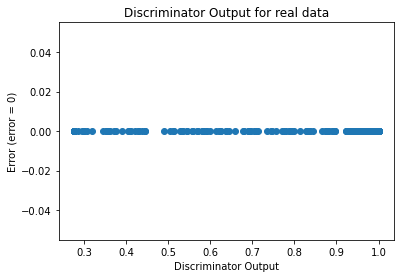

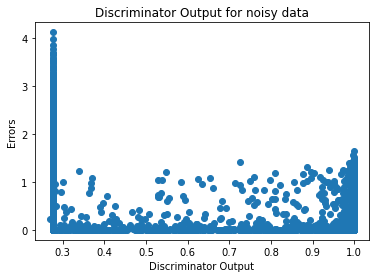

In [13]:
sanityChecks.discProbVsError(real_dataset,disc,device)